In [13]:
import tensorflow
from tensorflow import keras
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense


In [14]:
(x_train,y_train),(x_test,y_test)= tensorflow.keras.datasets.mnist.load_data()

In [15]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [16]:
import matplotlib.pyplot as plt

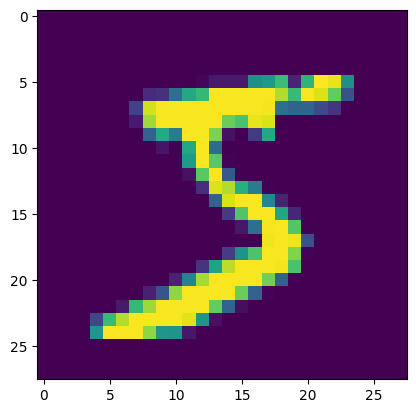

In [17]:
plt.imshow(x_train[0])

In [18]:
x_train.shape

(60000, 28, 28)

In [19]:
import seaborn as sns

<Axes: >

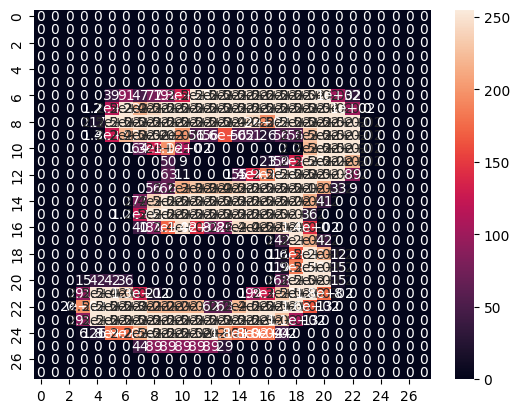

In [25]:
sns.heatmap(x_train[111],annot=True)

In [26]:
x_valid,x_train =x_train[:5000]/255.,x_train[5000:]/255.
y_valid,y_train = y_train[:5000]/255.,y_train[5000:]/255.


In [27]:
import tensorflow as tf

In [28]:
model = Sequential()


In [33]:
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

c:\Users\shekh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.layers

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [45]:
weight,bias = model.layers[3].get_weights()

In [46]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [47]:
weight.shape

(100, 10)

In [49]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='SGD')

In [50]:
model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid),batch_size=32)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0941 - loss: 0.0768 - val_accuracy: 0.0958 - val_loss: 6.4856e-04
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0978 - loss: 5.3033e-04 - val_accuracy: 0.0958 - val_loss: 3.0786e-04
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0989 - loss: 2.8045e-04 - val_accuracy: 0.0958 - val_loss: 2.0036e-04
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0966 - loss: 1.8622e-04 - val_accuracy: 0.0958 - val_loss: 1.4804e-04
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0997 - loss: 1.3220e-04 - val_accuracy: 0.0958 - val_loss: 1.1719e-04
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 1.0812e-04 - val_accuracy: 0.0958 - val_loss: 9.6898e-05
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1003 - loss: 8.7005e-05 - val_accuracy: 0.0958 - val_loss: 8.2560e-05
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━